In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [29]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\Student_Marks.csv')

In [5]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.duplicated().sum()

0

In [9]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


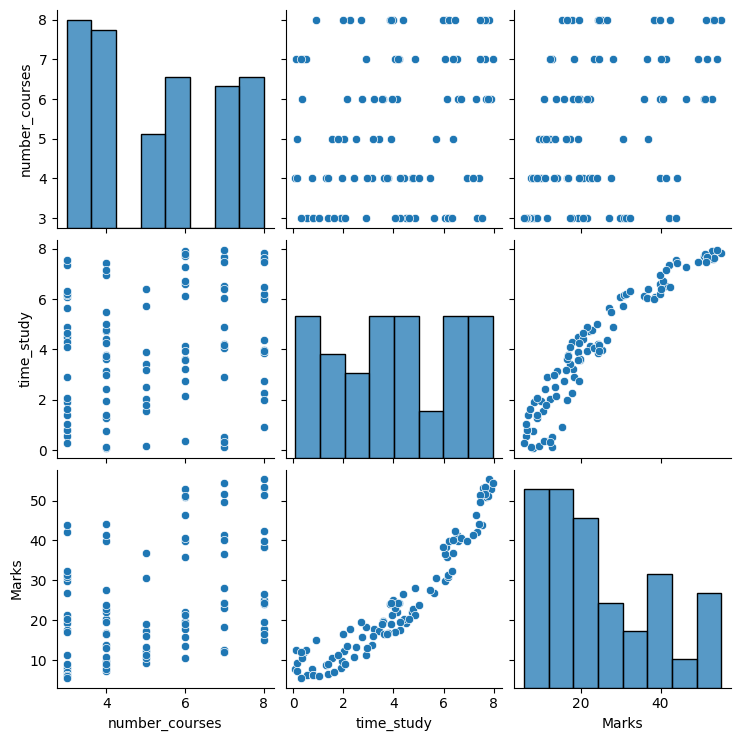

In [11]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='number_courses', ylabel='count'>

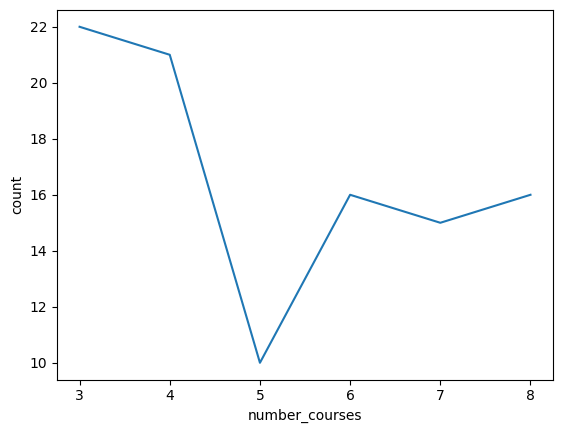

In [12]:
sns.lineplot(df.number_courses.value_counts())

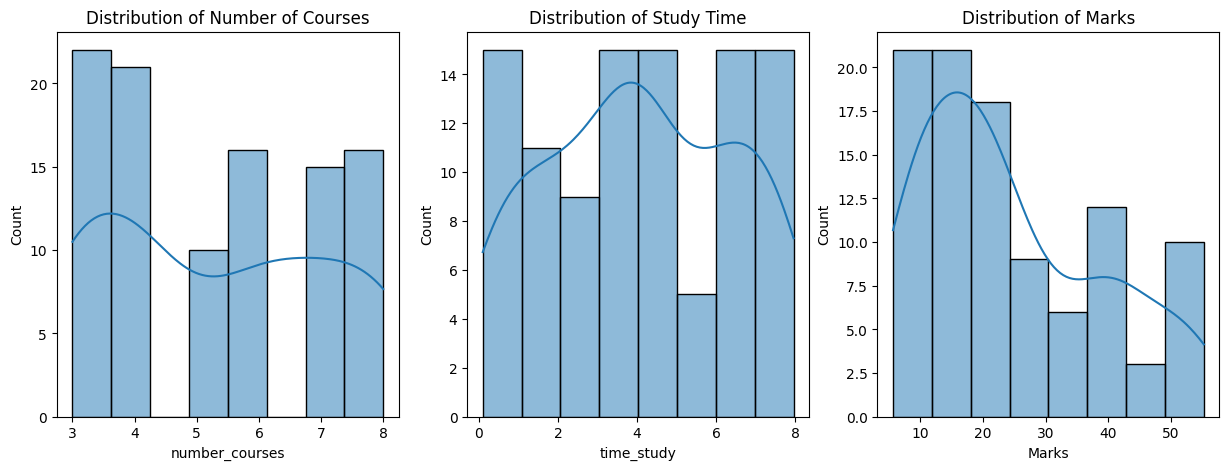

In [13]:
# 5. Distribution Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['number_courses'], kde=True)
plt.title('Distribution of Number of Courses')

plt.subplot(1, 3, 2)
sns.histplot(df['time_study'], kde=True)
plt.title('Distribution of Study Time')

plt.subplot(1, 3, 3)
sns.histplot(df['Marks'], kde=True)
plt.title('Distribution of Marks')

plt.show()

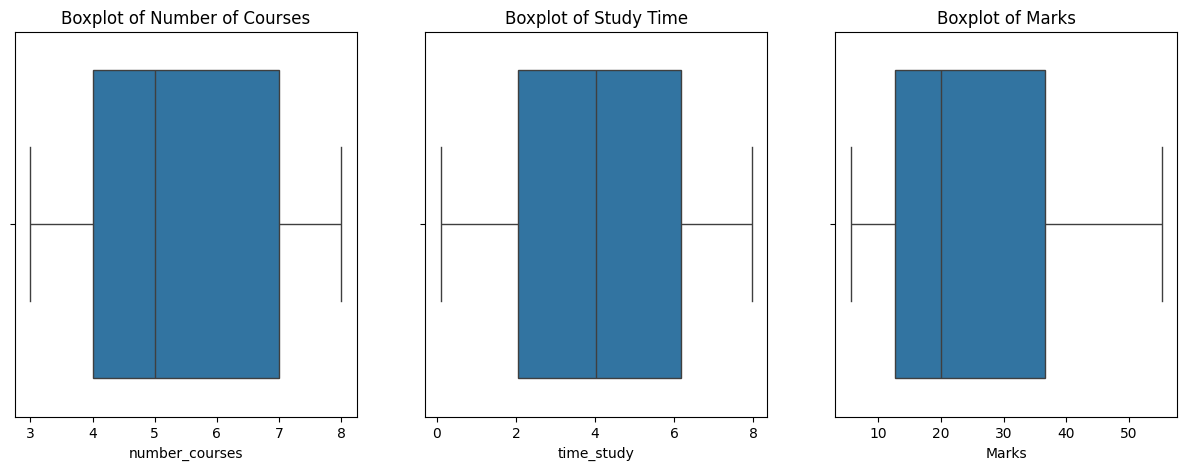

In [14]:
# 6. Boxplots to identify outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['number_courses'])
plt.title('Boxplot of Number of Courses')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['time_study'])
plt.title('Boxplot of Study Time')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Marks'])
plt.title('Boxplot of Marks')

plt.show()


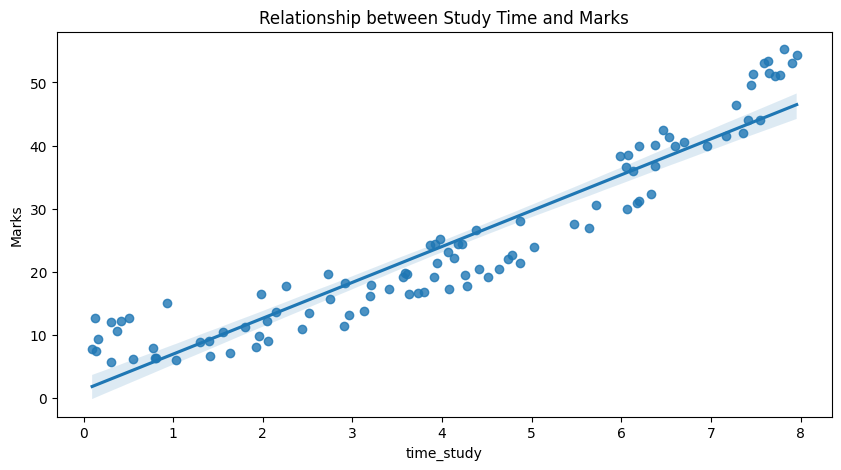

In [15]:
# 7. Scatter Plot with Regression Line
plt.figure(figsize=(10, 5))
sns.regplot(x='time_study', y='Marks', data=df)
plt.title('Relationship between Study Time and Marks')
plt.show()

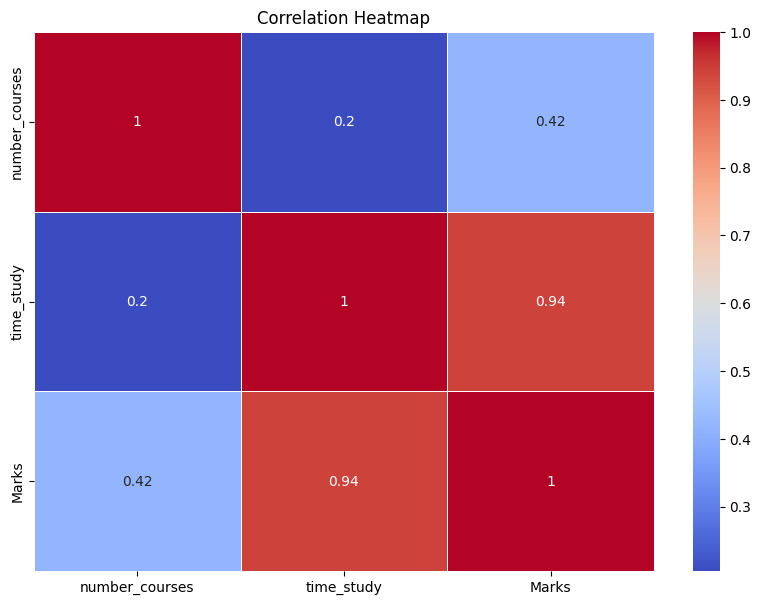

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
x=np.array(df[['time_study','number_courses']])
y=np.array(df[['Marks']])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9459936100591211

In [22]:
features=np.array([[4.508,3]])
model.predict(features)

array([[22.30738483]])

In [27]:
from sklearn.model_selection import cross_val_score

# Assuming rf is your model
scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
mean_score = -scores.mean()
print(f"Cross-Validation Mean Squared Error: {mean_score}")


Cross-Validation Mean Squared Error: 12.924567708609391


In [ ]:
# Suppose you want to use Min-Max Normalization
scaler = MinMaxScaler()
X = df[['number_courses', 'time_study']]
X_normalized = scaler.fit_transform(X)

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df['Marks'], test_size=0.2, random_state=42)

# Re-training the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predicting and evaluating
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error after Normalization: {mse}")
print(f"R-squared after Normalization: {r2}")
